# Intel Products Sentiment Analysis

## Introduction


This notebook provides a comprehensive sentiment analysis of Intel product reviews scraped from various online sources. The goal is to clean the data, analyze the sentiment of the reviews, and provide actionable insights and recommendations for improving Intel products based on customer feedback.


## Step 1: Data Cleaning

In [9]:

import pandas as pd
import re
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer

nltk.download('stopwords')
nltk.download('punkt')
nltk.download('wordnet')

file_path = 'reviews.csv'
reviews_df = pd.read_csv(file_path)

def clean_text(text):
    text = re.sub(r'<.*?>', '', text)
    text = re.sub(r"n't", " not", text)
    text = re.sub(r"'re", " are", text)
    text = re.sub(r"'s", " is", text)
    text = re.sub(r"'d", " would", text)
    text = re.sub(r"'ll", " will", text)
    text = re.sub(r"'t", " not", text)
    text = re.sub(r"'ve", " have", text)
    text = re.sub(r"'m", " am", text)
    text = text.lower()
    text = re.sub(r'[^\w\s]', '', text)
    words = word_tokenize(text)
    words = [word for word in words if word not in stopwords.words('english')]
    lemmatizer = WordNetLemmatizer()
    words = [lemmatizer.lemmatize(word) for word in words]
    return ' '.join(words)

reviews_df['content'] = reviews_df['content'].astype(str)

reviews_df['cleaned_content'] = reviews_df['content'].apply(clean_text)

reviews_df[['content', 'cleaned_content']].head()


[nltk_data] Downloading package stopwords to C:\Users\Debjit
[nltk_data]     Mandal\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to C:\Users\Debjit
[nltk_data]     Mandal\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to C:\Users\Debjit
[nltk_data]     Mandal\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


,content,cleaned_content
0,"No doubt, 12th gen Intel processors are a marv...",doubt 12th gen intel processor marvel computin...
1,I have paired this processor with Asus Prime Z...,paired processor asus prime z690a motherboard ...
2,自分のCPUが結構古いので、12年ぶりにアップグレードしました。\n最初はRYZENに迷って...,自分のcpuが結構古いので12年ぶりにアップグレードしました 最初はryzenに迷っていたが...
3,"Processore eccellente, montato sul pc perfetta...",processore eccellente montato sul pc perfettam...
4,"Does exactly what it's supposed to do, my comp...",exactly supposed computer work great


## Step 2: Sentiment Analysis

In [6]:
from transformers import pipeline, AutoTokenizer, TFAutoModelForSequenceClassification

model_name = "nlptown/bert-base-multilingual-uncased-sentiment"
tokenizer = AutoTokenizer.from_pretrained(model_name)
model = TFAutoModelForSequenceClassification.from_pretrained(model_name)
sentiment_model = pipeline('sentiment-analysis', model=model, tokenizer=tokenizer)

def analyze_sentiment(text):
    result = sentiment_model(text, truncation=True, max_length=512)
    label = result[0]['label']
    if label in ['1 star', '2 stars']:
        return 'negative'
    elif label == '3 stars':
        return 'neutral'
    else:
        return 'positive'

reviews_df['sentiment'] = reviews_df['cleaned_content'].apply(analyze_sentiment)

reviews_df[['cleaned_content', 'sentiment']].head()

tf_model.h5:   0%|          | 0.00/670M [00:00<?, ?B/s]

C:\Users\Debjit Mandal\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\huggingface_hub\file_download.py:157: UserWarning: `huggingface_hub` cache-system uses symlinks by default to efficiently store duplicated files but your machine does not support them in C:\Users\Debjit Mandal\.cache\huggingface\hub\models--nlptown--bert-base-multilingual-uncased-sentiment. Caching files will still work but in a degraded version that might require more space on your disk. This warning can be disabled by setting the `HF_HUB_DISABLE_SYMLINKS_WARNING` environment variable. For more details, see https://huggingface.co/docs/huggingface_hub/how-to-cache#limitations.
To support symlinks on Windows, you either need to activate Developer Mode or to run Python as an administrator. In order to see activate developer mode, see this article: https://docs.microsoft.com/en-us/windows/apps/get-started/enable-your-device-for-development
  wa

,cleaned_content,sentiment
0,doubt 12th gen intel processor marvel computin...,neutral
1,paired processor asus prime z690a motherboard ...,positive
2,自分のcpuが結構古いので12年ぶりにアップグレードしました 最初はryzenに迷っていたが...,negative
3,processore eccellente montato sul pc perfettam...,positive
4,exactly supposed computer work great,positive


## Step 3: Sentiment Distribution

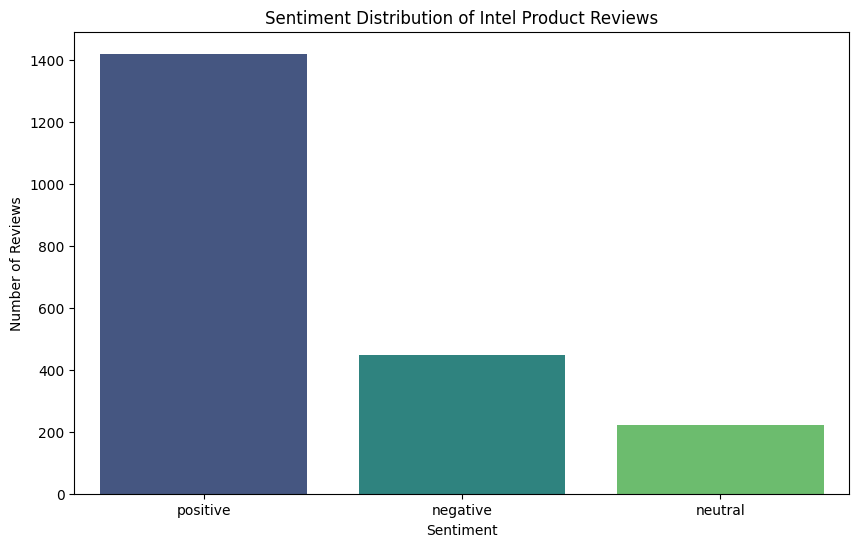

sentiment
positive    1421
negative     449
neutral      223
Name: count, dtype: int64

In [7]:

import matplotlib.pyplot as plt
import seaborn as sns

sentiment_counts = reviews_df['sentiment'].value_counts()

plt.figure(figsize=(10, 6))
sns.barplot(x=sentiment_counts.index, y=sentiment_counts.values, palette='viridis')
plt.title('Sentiment Distribution of Intel Product Reviews')
plt.xlabel('Sentiment')
plt.ylabel('Number of Reviews')
plt.show()

sentiment_counts


## Step 4: Insights and Recommendations


### Sentiment Distribution

- **Positive Reviews**: The majority of the reviews are positive, indicating a generally favorable perception of Intel products among customers.
- **Neutral Reviews**: A significant number of reviews are neutral, suggesting areas where improvements or more detailed feedback might be provided.
- **Negative Reviews**: Although relatively few, negative reviews highlight areas where customers are dissatisfied.

### Recommendations

1. **Strengthen Positives**: Leverage the aspects customers are happy with, such as performance and compatibility, to market the products more effectively.
2. **Address Neutral Feedback**: Investigate the neutral reviews to understand what might be missing or unclear. Provide more detailed product information and support to convert neutral feedback into positive.
3. **Improve Negatives**: Focus on the areas highlighted in negative reviews. Common issues might include product quality, customer service, or specific features that need improvement.


## Conclusion


This sentiment analysis of Intel product reviews provides valuable insights into customer perceptions and areas for improvement. By addressing the feedback, Intel can enhance customer satisfaction and product quality.
